# U.S. Medical Insurance Costs

I will be doing some basic EDA on the U.S Medical Insurance Costs data set.
I'll start by importing the modules I will be using.

In [104]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Let's import the CSV file and get a good summary of this data set.

In [105]:
df = pd.read_csv("insurance.csv")
print(df.info())
print(df)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None
      age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333  

This gives us a basic overview of our dataset.
We can see that there are 1338 rows of data.
All Dtypes are what we want them to be so there isn't too much we need to do here.

In [106]:
df.describe(include='all')

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338,1338.000000,1338.000000,1338,1338,1338.000000
unique,NaN,2,NaN,NaN,2,4,NaN
top,NaN,male,NaN,NaN,no,southeast,NaN
freq,NaN,676,NaN,NaN,1064,364,NaN
mean,39.207025,NaN,30.663397,1.094918,NaN,NaN,13270.422265
std,14.049960,NaN,6.098187,1.205493,NaN,NaN,12110.011237
min,18.000000,NaN,15.960000,0.000000,NaN,NaN,1121.873900
25%,27.000000,NaN,26.296250,0.000000,NaN,NaN,4740.287150
50%,39.000000,NaN,30.400000,1.000000,NaN,NaN,9382.033000
75%,51.000000,NaN,34.693750,2.000000,NaN,NaN,16639.912515


Here we can see a basic analysis of our dataset.
Let's start by analyzing the data by region.

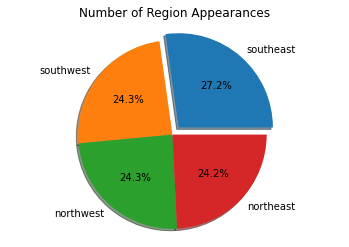

In [107]:
regions = ['southeast', 'southwest', 'northwest', 'northeast']
plt.pie(df.region.value_counts(), labels=regions, autopct='%1.1f%%', explode=(0.10, 0, 0, 0), shadow=True)
plt.title('Number of Region Appearances')
plt.axis('equal')
plt.show()


Here we can see which region appears the most visualized as a pie chart.
Looking at the chart and the data we can see that the southeast region makes up the largest percentage of the dataset. 

Now lets take a look at the averages of some of our data.

In [108]:
region_averages = df.groupby(['region']).mean()
print(region_averages)

                 age        bmi  children       charges
region                                                 
northeast  39.268519  29.173503  1.046296  13406.384516
northwest  39.196923  29.199785  1.147692  12417.575374
southeast  38.939560  33.355989  1.049451  14735.411438
southwest  39.455385  30.596615  1.141538  12346.937377


<AxesSubplot:title={'center':'Mean charges for region'}>

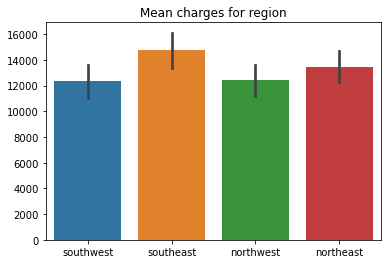

In [109]:
 plt.title('Mean charges for region')
 sns.barplot(x = region, y = charges, data = region_averages)

This shows us that the southeast region also has on average higher charges for insurance.

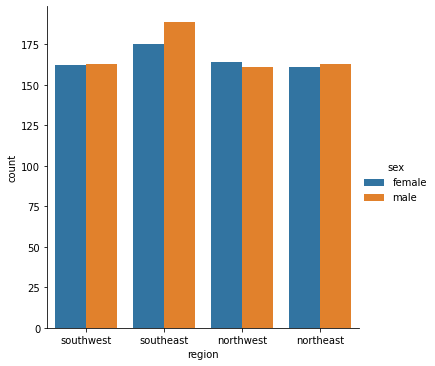

In [110]:
sns.catplot(x = 'region', data = df, kind = 'count', hue = 'sex')


Doing basic analysis we can see that our data is pretty balanced and there seems to be pretty even representation of males and females across all regions.

Next we will start looking at age and how it relates to the rest of our data.

<AxesSubplot:>

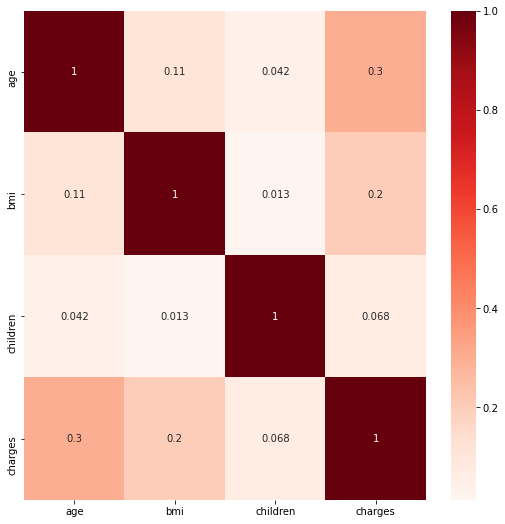

In [111]:
plt.figure(figsize=(9,9))
sns.heatmap(df.corr(), annot=True, cmap='Reds')

Looking at our correlation matrix we can see that age has the highest correlation when compared to the other values.

Lets do some more analysis on the relationship age has with the rest of our data.

<AxesSubplot:>

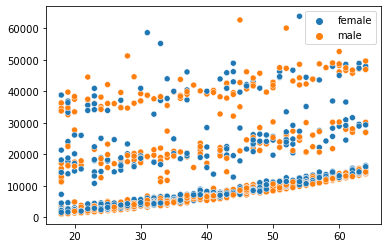

In [112]:

sns.scatterplot(x=age, y=charges, hue=sex)

This scatter plot gives us a visual representation of the positive relationship between age and charges.

Finally im going to compare smoker and non-smoker charges.

In [115]:
smoker_averages = df.groupby(['smoker']).mean()
smoker_averages


,age,bmi,children,charges
smoker,,,,
no,39.385338,30.651795,1.090226,8434.268298
yes,38.514599,30.708449,1.113139,32050.231832


<AxesSubplot:title={'center':'Smoker VS. Non-Smoker Charges by Age'}, xlabel='Age', ylabel='Insurance Cost'>

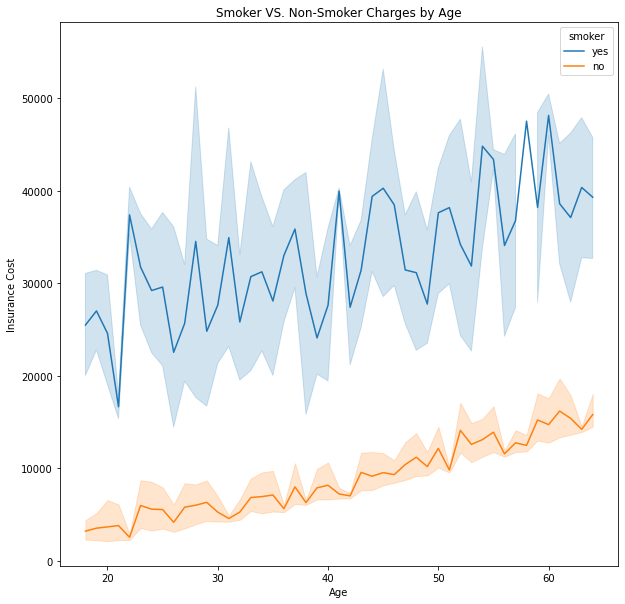

In [128]:
plt.figure(figsize=(10, 10))
plt.title('Smoker VS. Non-Smoker Charges by Age')
plt.ylabel('Insurance Cost')
plt.xlabel('Age')
sns.lineplot(x='age', y='charges', data=df, hue='smoker',)


Here we can see that on average smokers pay almost 4x more than non-smokers when it comes to insurance costs.
Those with the highest insurance costs to be smokers who are high in age.
